In [1]:
import requests
import json
from contextlib import closing

# Make an NYTimes developer account, save key to .txt file
with open('../NYTimesAPI.txt') as f:
    api_key = f.read()

# make base URL and dictionary of get request key/values
# Example Call : https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election&api-key=yourkey
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
payload = {'api-key': api_key, 'q':'Amazon'} # key/values for get request

# Perform the actual request
with closing(requests.get(url, params=payload)) as r:
    articles = r.json()

summary_text = [x['snippet'] for x in articles['response']['docs']]
summary_text

['A rise in illegal deforestation heightens the risk of fires in the Brazilian rainforest even more destructive than those that drew global outrage last year.',
 'The rainforest and its Indigenous groups face existential threats, while criminals act as if they have license to plunder.',
 'Mr. Paiakan became celebrated internationally for his campaigns in Brazil, even appearing once with Sting. He died of Covid-19.',
 'Brazil was responsible for more than a third of the total global loss in 2019.',
 'Sandra Benites, of the Guaraní Ñandeva people, is using art to bring new visions and voices to the museum world.',
 'Scientists have produced data that shows the range of an enigmatic short-eared canid species that has yet to be widely studied.',
 'President Jair Bolsonaro is moving aggressively to open up the Amazon rainforest to commercial development, posing an existential threat to the tribes living there.',
 'New research from Stanford University holds lessons for a world reeling from 

In [2]:
import json

with open('data/nytime.json', encoding='utf8') as f:
    articles = json.load(f)

# return the summary of the each article
summary_text = [x['snippet'] for x in articles['response']['docs']]
summary_text

['David Goldblatt’s “The Games” recalls unflattering aspects of the Olympics long before doping and gender testing.',
 'Penalizing a country for doping seems to be a much more effective way to ensure rapid and enduring change.',
 'Loroupe, who won the New York City Marathon in 1994 and 1995, is the leader of the 10 displaced athletes who make up the Refugee Olympic Team.',
 'It is time to focus on the folks going to Rio without fear or complaint — like Diana Taurasi and Sue Bird, who hope to win their fourth gold with the United States women’s basketball team.',
 'Fans may want athletes to be drug free, but they also want to be entertained by raw power, and there has long been a wink-and-nod pragmatism about weight lifting in particular.',
 'By deciding against a complete ban of Russian athletes from the Rio Games, the International Olympic Committee is sending mixed messages.',
 'How did The New York Times prepare for its Olympics coverage? Here’s a quantitative look.',
 'A real-time 

In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

# This object is able to count words in a doc
count_vect = CountVectorizer()

# Learn a vocabulary: dict of all tokens in the raw documents.
# bag_words = count_vect.fit(summary_text)

# Transform documents to document-term matrix.
# bag_words = count_vect.transform(summary_text)

# outputs found words throughout all documents and outputs as 1D array
# print(count_vect.get_feature_names())

# Learn the vocabulary dictionary and return document-term matrix.
bag_words = count_vect.fit_transform(summary_text)

# shape(num of doc's, num of found words)
print(bag_words.shape)

# (Document row index, Word column index) # of occurrences in set
print(bag_words[0]) # or print(bag_words.toarray())

(10, 161)
  (0, 34)	1
  (0, 64)	1
  (0, 138)	2
  (0, 58)	1
  (0, 120)	1
  (0, 145)	1
  (0, 11)	1
  (0, 98)	1
  (0, 101)	1
  (0, 84)	1
  (0, 18)	1
  (0, 40)	1
  (0, 10)	1
  (0, 60)	1
  (0, 137)	1


In [4]:
# print out the size of vocabulary
print(len(count_vect.vocabulary_))

# print vocabulary (key) w/ corresponding value
print(count_vect.vocabulary_)

#count_vect.inverse_transform(bag_words[0])

161
{'david': 34, 'goldblatt': 64, 'the': 138, 'games': 58, 'recalls': 120, 'unflattering': 145, 'aspects': 11, 'of': 98, 'olympics': 101, 'long': 84, 'before': 18, 'doping': 40, 'and': 10, 'gender': 60, 'testing': 137, 'penalizing': 107, 'country': 32, 'for': 52, 'seems': 126, 'to': 144, 'be': 16, 'much': 95, 'more': 94, 'effective': 42, 'way': 149, 'ensure': 44, 'rapid': 117, 'enduring': 43, 'change': 24, 'loroupe': 86, 'who': 152, 'won': 158, 'new': 96, 'york': 160, 'city': 26, 'marathon': 88, 'in': 73, '1994': 1, '1995': 2, 'is': 75, 'leader': 80, '10': 0, 'displaced': 38, 'athletes': 13, 'make': 87, 'up': 147, 'refugee': 121, 'olympic': 100, 'team': 136, 'it': 76, 'time': 142, 'focus': 50, 'on': 102, 'folks': 51, 'going': 62, 'rio': 124, 'without': 156, 'fear': 49, 'or': 103, 'complaint': 29, 'like': 83, 'diana': 36, 'taurasi': 135, 'sue': 132, 'bird': 20, 'hope': 70, 'win': 153, 'their': 139, 'fourth': 54, 'gold': 63, 'with': 155, 'united': 146, 'states': 130, 'women': 157, 'bask

In [5]:
import pandas as pd

pd.options.display.max_columns = 999
df = pd.DataFrame(data = bag_words.toarray(), columns = count_vect.get_feature_names())
df

,10,1994,1995,2016,about,account,against,agence,agency,also,and,aspects,associated,athletes,ban,basketball,be,been,before,bid,bird,boston,but,by,change,citizens,city,comeback,committee,complaint,complete,countries,country,coverage,david,deciding,diana,did,displaced,dominated,doping,drug,effective,enduring,ensure,entertained,essay,european,fans,fear,focus,folks,for,fought,fourth,france,free,from,games,gatlin,gender,getty,going,gold,goldblatt,has,have,here,heroes,history,hope,how,images,in,international,is,it,its,justin,katie,leader,ledecky,lifting,like,long,look,loroupe,make,marathon,may,memories,messages,mixed,modern,more,much,new,nod,of,olympians,olympic,olympics,on,or,particular,past,peerless,penalizing,photo,photographers,power,pragmatism,prepare,press,presse,pressphoto,quantitative,rapid,raw,real,recalls,refugee,reject,reuters,rio,russian,seems,sending,snapshot,sprinter,states,stream,sue,summer,swimmer,taurasi,team,testing,the,their,there,they,time,times,to,unflattering,united,up,want,way,weight,which,who,win,wink,with,without,women,won,writers,york
0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,2,1,0,0,1,0,3,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0
4,0,0,0,0,1,0,0,0,0,1,2,0,0,1,0,0,2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,1,

In [6]:
# print out 10 most common words in our data
df.sum().sort_values()[-10:]

for          3
who          3
by           3
olympics     4
is           4
their        4
of           8
to           8
and          9
the         18
dtype: int64

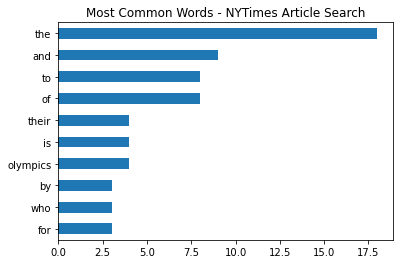

In [7]:
# plot the data frame
%matplotlib inline

# 10 most common words found
df.sum().sort_values()[-10:].plot(kind='barh', title = "Most Common Words - NYTimes Article Search")

# 1 least common words found
# df.sum().sort_values()[:10].plot(kind='barh', title = "Least Common Words - NYTimes Article Search")

# TF-IDF Conversion
We have a very small sample of data, but lets covert to tf-idf for the sake of programming it. Recall that Tf-idf transformation (default in `sklearn` is):

$$ \text{tf}(t,d) = f_{td}\text{, } t\in T \text{ and } d \in D $$

$$ \text{idf}(t,d) = \log{\frac{|D|}{|n_t|}}\text{, where } n_t=d\in D \text{ with } t\in d $$

$$\text{tf-idf}(t,d)=\text{tf}(t,d) \cdot (1+\text{idf}(t,d))$$

- http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

tfidf_mat = tfidf_vect.fit_transform(summary_text)

# convert to pandas to get a better view/understanding
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df

,10,1994,1995,2016,about,account,against,agence,agency,also,and,aspects,associated,athletes,ban,basketball,be,been,before,bid,bird,boston,but,by,change,citizens,city,comeback,committee,complaint,complete,countries,country,coverage,david,deciding,diana,did,displaced,dominated,doping,drug,effective,enduring,ensure,entertained,essay,european,fans,fear,focus,folks,for,fought,fourth,france,free,from,games,gatlin,gender,getty,going,gold,goldblatt,has,have,here,heroes,history,hope,how,images,in,international,is,it,its,justin,katie,leader,ledecky,lifting,like,long,look,loroupe,make,marathon,may,memories,messages,mixed,modern,more,much,new,nod,of,olympians,olympic,olympics,on,or,particular,past,peerless,penalizing,photo,photographers,power,pragmatism,prepare,press,presse,pressphoto,quantitative,rapid,raw,real,recalls,refugee,reject,reuters,rio,russian,seems,sending,snapshot,sprinter,states,stream,sue,summer,swimmer,taurasi,team,testing,the,their,there,they,time,times,to,unflattering,united,up,want,way,weight,which,who,win,wink,with,without,women,won,writers,york
0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142208,0.291734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291734,0.000000,0.000000,0.000000,0.00000,0.000000,0.248000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.216971,0.000000,0.291734,0.000000,0.000000,0.000000,0.291734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.248000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.156611,0.000000,0.000000,0.192903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291734,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291734,0.259008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291734,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125925,0.000000,0.000000,0.000000,0.000000,0.000000,0.219603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258328,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.219603,0.000000,0.258328,0.258328,0.258328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.192127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258328,0.258328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258328,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.258328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.341628,0.000000,0.000000,0.00000,0.000000,0.258328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.180101,0.21186,0.21186,0.000000,0.000000,0.0

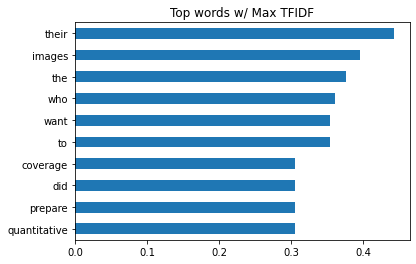

In [9]:
# print out 10 words with max tfidf, normalized by document occurrence
df.max().sort_values()[-10:].plot(kind='barh', title='Top words w/ Max TFIDF')

In [10]:
from sklearn.datasets import fetch_20newsgroups
bunch = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

# bunch.data = The data to learn
print(len(bunch.data))

print("=============")

# Name of target classes
bunch.target_names

11314


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
print(bunch.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [12]:
# print the targeted class for bunch.target[0]
bunch.target_names[bunch.target[0]]

'rec.autos'

In [13]:
import numpy as np

# generate a random index
idx = round(np.random.rand() * len(bunch.data))
print("\n".join(bunch.data[idx].split("\n")))

From: mckay@alcor.concordia.ca (John McKay)
Subject: Lasers for dermatologists
Originator: mckay@alcor.concordia.ca
Nntp-Posting-Host: alcor.concordia.ca
Organization: Concordia University, Montreal, Quebec
Lines: 15


Having had limited tinea pedis for more than 30 years, and finding
it resistant to ALL creams and powders I have tried, I wonder why
dermatologists do not use lasers to destroy the fungus. It would
seem likely to be effective and inexpensive. Are there good reasons
for not using lasers?
I was told that dermatology had not yet reached the laser age.

John McKay
vax2.concordia.ca

-- 
Deep ideas are simple.
                      Odd groups are even.
                                           Even simples are not.



In [14]:
%%time
news_tfidf = tfidf_vect.fit_transform(bunch.data)

Wall time: 4.28 s


In [15]:
print(news_tfidf.shape)

(11314, 130107)


In [16]:
# tfidf_vect.vocabulary_

In [17]:
# create pandas dataframe by getting max values on all the rows in each column
vec = news_tfidf.max(axis=0)
df  = pd.DataFrame(data=vec.toarray(),columns=tfidf_vect.get_feature_names())

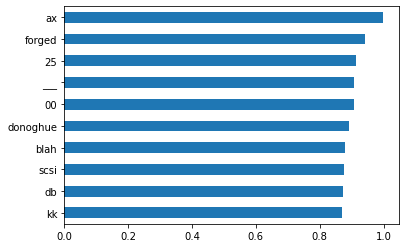

In [18]:
# largest tfidf
df.max().sort_values()[-10:].plot(kind='barh')

(11314, 28592)


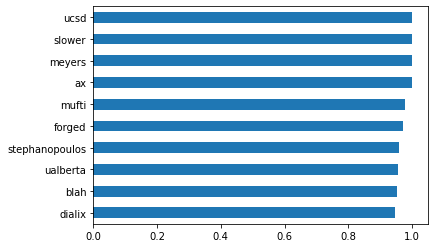

In [19]:
# Now with a smaller vocabulary
tfidf_vect = TfidfVectorizer(stop_words='english', max_df=0.01,min_df=4)
news_tfidf = tfidf_vect.fit_transform(bunch.data)
print(news_tfidf.shape)
vec=news_tfidf.max(axis=0)
df = pd.DataFrame(data=vec.toarray(),columns=tfidf_vect.get_feature_names())
df.max().sort_values()[-10:].plot(kind='barh')

(11314, 79340)


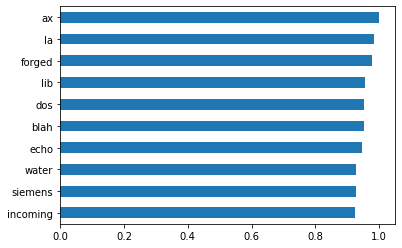

In [20]:
# read in scrabble dictionary from file
with open('data/ospd.txt') as f:
    vocab = f.read().split('\n')

# now lets do the transformation with a custom vocabulary
tfidf_vect = TfidfVectorizer(vocabulary=vocab)
news_tfidf = tfidf_vect.fit_transform(bunch.data)
print(news_tfidf.shape)
vec=news_tfidf.max(axis=0)
df = pd.DataFrame(data=vec.toarray(),columns=tfidf_vect.get_feature_names())
df.max().sort_values()[-10:].plot(kind='barh')
